#### ____

# &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; &nbsp;                        Análise OECD - Data Science
### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; Guilherme Tamer Lotaif

<br>


### Introducão:

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; O objetivo deste projeto é construir uma análise exploratória detalhada de diferentes países, dos quais podem pertencer ou não a uma determinada organização internacional. Tal análise será feita através de dados selecionados de diferentes anos, que serão extraidos do site www.gapminder.com.
<br><br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; A Organização escolhida foi a **OECD** (Organisation for Economic Co-operation and Development), que atualmente é constituida por 36 países, cuja maior parte de seus membros possui economias desenvolvidas, além disso, também contam com um alto nível de IDH (Indíce de desenvolvimento humano). A Organização economica intergovernamental foi fundada em 1961, com a finalidade de estimular o progresso econômico e o comércio mundial, e entre seus principais objetivos estão: O aumento do nível de vida; o desenvolvimento de empregos e o mantimento da estabilidade financeira.<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; Além da ajuda que a OECD fornece aos seus membros, ela também fornece seus conhecimentos com mais de 100 outros países e economias, dentre eles estão: Barasil, Russia, China e Africa do Sul, estes são considerados como parceiros da organização.
<br><br>

### Pergunta norteadora:
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; **Será que os membros da OECD têm um crescimento no seu IDH e GDP per capita maior do que os países que não pertencem a organização? um possível crescimento poderia estar relacionado aos investimentos estrangeiros?**
<br><br>

### Hipóteses:

- Os países membros da OECD podem não ter uma alteração substancial, após comecar a fazer parte da organização, uma vez que como as suas diretrizes não passam de meras sugestões, e portanto não são obrigatórias, como mencionado no artigo: [www.gresea.be](http://www.gresea.be/OECD-Guidelines-its-pros-and-cons) . Com esta ausência de comprometimento, as grandes empresas podem simplesmente ignorar os regulamentos da OECD, de maneira que a participação do país não gera uma mudança significativa no crescimento do PIB per capta, assim como o IDH.
<br><br>
- Ao se juntar a OECD o país se torna mais atrativo para os outros integrantes do grupo, decorrente do suporte que a organização fornece, este fato aumenta a confiabilidade do país em questão. Outro fator que atrai interesse dos outros membros, é o fato de possuirem as mesmas intenções e aspirações, que é comprovado pelo descritivo encontrado no site: [worldpopulationreview.com](http://worldpopulationreview.com/countries/oecd-countries/). Portanto podemos assumir que é provável a ocorrência do crescimento tanto do IDH quanto do PIB per capta.
<br><br>

___

### Bibliotecas:

Vamos importar as bibliotecas que serão necessarias para realizar nossas analises:

In [4]:
#Importando bibliotecas:
%matplotlib inline
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings

plt.style.use('ggplot')
sns.set_palette("RdYlBu")

In [5]:
warnings.filterwarnings("ignore")

___
### 1. Importação e limpeza dos Arquivos

Os bancos de dados selecionados para este projeto são:

- [IDH (Índice de Desenvolvimento Humano)](https://docs.google.com/spreadsheet/pub?key=tyadrylIpQ1K_iHP407374Q)
- [PIB (Produto Interno Bruto)](https://docs.google.com/spreadsheet/pub?key=0AkBd6lyS3EmpdHo5S0J6ekhVOF9QaVhod05QSGV4T3c)
- [Foreign investment](https://docs.google.com/spreadsheets/d/1dHWaMTB9h7rdFI3DLZ3Pgpur2l3p2hgz93THK2oB8Jc/pub)

#### Descrição:


**IDH**: O Índice de Desenvolvimento Humano é utilizado como ferramenta de comparação entre os países. Tal indice é medido através dos seguintes marcadores: Anos médios de estudos(educação); Expectativa de vida da população(longevidade) e Produto Interno Bruto per capita. O relatório anual de IDH é feito pelo Programa das Nações Unidas para o Desenvolvimento, que é um orgão da ONU (Organização das Nações Unidas).
<br><br>
**PIB**: O Produto Interno Bruto é a soma em valores monetários dos serviços finais e bens produzidos em uma região, durante um período determinado. O PIB é um dos marcadores mais utilizados na macroeconomia, ele é medido através de três ópticas: a da despesa, da oferta e a do rendimento.
<br><br>
**Investimento estrangeiro**: Este ocorre quando uma companhia ou um individuo de uma nação investe em ações ou ativos de outra nação. Ter investimentos estrangeiros em seu país é um bom sinal, uma vez que este costuma estar relacionado ao crescimento de empregos e aumento salarial. Além de ser um forte indicador que a economia daquela nação é estavel.

<br>

In [6]:
#Imporatndo os arquivos de indicadores básicos:
HDI = pd.read_excel('Data/Indicator_HDI.xlsx')
GDP = pd.read_excel('Data/Indicator GDP at market prices.xlsx')

#Imporatndo um arquivo específico:
Foreign_investment = pd.read_excel("Data/Foreign direct investment.xlsx")

## ...

#### 1.1 Selecionando os anos que iremos análisar:<br>
Para que o estudo tenha uma acurácia maior, temos que comparar dados de mais do que um único ano, no caso iremos análisar os dados dos anos de: **`1980`**,**`1990`**, **`2000`**, **`2009`**, em diferentes países. Além disso, temos que alterar o índice de cada dataset importado, para que nosso dataframe final fique mais limpo.


In [7]:
#Selecionando o ano que iremos análisar dos indicadores básicos:
HDI_years = HDI.loc[:, ["HDI",1980,1990,2000, 2009]]
GDP_years = GDP.loc[:, ["GDP (constant 2000 US$)",1980,1990,2000, 2009]]

#Selecionando o ano que iremos análisar do arquivo específico:
Foreign_investment_years = Foreign_investment.loc[:, ["country",1980,1990,2000, 2009]]

#### ...

####  Adicionando uma coluna no dataframe para dizer quem pertence à organização:

Esta coluna irá possibilitar que sejam feitas comparações entre os países de dentro e fora da organização, que inclusive nos permite análisar a diferença que fez para os países que viraram membros neste meio tempo.

In [5]:
#Criando uma lista com os Países que fazem parte da OECD atualmente:
Paises_OECD = ["Australia","Austria","Belgium","Canada","Chile","Czech Republic","Denmark","Estonia","Finland",
               "France","Germany","Greece","Hungary","Iceland","Ireland","Israel","Italy","Japan","South Korea",
               "Latvia","Lithuania","Luxembourg","Mexico","Netherlands","New Zealand","Norway","Poland","Portugal",
               "Slovakia","Slovenia","Spain","Sweden","Switzerland","Turkey","United Kingdom","United States"]

In [6]:
#Utilizando a lista de países para definirmos os membros em nossa nova coluna:
for i in Paises_OECD:
        HDI_years.loc[(HDI_years.iloc[:,0] == i), 'OECD'] = 'DENTRO'
        GDP_years.loc[(GDP_years.iloc[:,0] == i), 'OECD'] = 'DENTRO'
        Foreign_investment_years.loc[(Foreign_investment_years.iloc[:,0] == i), 'OECD'] = 'DENTRO'

In [7]:
#Definindo os NaNs como países que nao pertencem a organização:
HDI_years_oecd = HDI_years.iloc[:,-1].replace(np.nan, 'FORA', regex=True)
GDP_years_oecd = GDP_years.iloc[:,-1].replace(np.nan, 'FORA', regex=True)
Foreign_investment_years_oecd = Foreign_investment_years.iloc[:,-1].replace(np.nan, 'FORA', regex=True)

In [8]:
#Juntando a nova coluna:
#Removendo a coluna criada para a definição dos membros:
HDI_years = HDI_years.join(HDI_years_oecd.to_frame(), how='inner', lsuffix='_DELETAR')
HDI_years = HDI_years.drop(['OECD_DELETAR'], axis=1)

GDP_years = GDP_years.join(GDP_years_oecd.to_frame(), how='inner', lsuffix='_DELETAR')
GDP_years = GDP_years.drop(['OECD_DELETAR'], axis=1)

Foreign_investment_years = Foreign_investment_years.join(Foreign_investment_years_oecd.to_frame(), how='inner', lsuffix='_DELETAR')
Foreign_investment_years = Foreign_investment_years.drop(['OECD_DELETAR'], axis=1)

In [9]:
#Vamos plotar um exemplo de um dos nossos dataframes:
HDI_years.sample()

,HDI,1980,1990,2000,2009,OECD
85,Greece,0.72,0.766,0.802,0.863,DENTRO


...

#### 1.2 Criando um Dataframe para cada ano:<br>
A partir dos datasets unitarios, com as informações dos países nos diferentes anos, será criado um dataframe que nos possibilitará fazer a análise explotratória, e com isso responder a pergunta feita no começo do projeto.

In [10]:
#Juntando todos datasets de 1990 em um dataframe:
df_1980 = HDI_years.iloc[:, 0].to_frame().join(HDI_years.iloc[:, 1].to_frame(), how='inner', lsuffix='PAÍSES', rsuffix='_GDP')
df_1980 = df_1980.join(GDP_years.iloc[:,1].to_frame(), how='inner', lsuffix='_GDP')
df_1980 = df_1980.join(Foreign_investment_years.iloc[:, 1].to_frame(), how='inner', lsuffix='FOREIGN INVESTMENT')

In [11]:
#Juntando todos datasets de 1990 em um dataframe:
df_1990 = HDI_years.iloc[:, 0].to_frame().join(HDI_years.iloc[:, 2].to_frame(), how='inner', lsuffix='PAÍSES', rsuffix='_GDP')
df_1990 = df_1990.join(GDP_years.iloc[:,2].to_frame(), how='inner', lsuffix='_GDP')
df_1990 = df_1990.join(Foreign_investment_years.iloc[:, 2].to_frame(), how='inner', lsuffix='FOREIGN INVESTMENT')

In [12]:
#Juntando todos datasets de 2000 em um dataframe:
df_2000 = HDI_years.iloc[:, 0].to_frame().join(HDI_years.iloc[:,3].to_frame(), how='inner', lsuffix='PAÍSES', rsuffix='_GDP')
df_2000 = df_2000.join(GDP_years.iloc[:,3].to_frame(), how='inner', rsuffix='_GDP')
df_2000 = df_2000.join(Foreign_investment_years.iloc[:, 3].to_frame(), how='inner', lsuffix='FOREIGN INVESTMENT')

In [13]:
#Juntando todos datasets de 2009 em um dataframe:
df_2009 = HDI_years.iloc[:, 0].to_frame().join(HDI_years.iloc[:,4].to_frame(), how='inner', lsuffix='PAÍSES', rsuffix='_GDP')
df_2009 = df_2009.join(GDP_years.iloc[:, 4].to_frame(), how='inner', lsuffix='_GDP')
df_2009 = df_2009.join(Foreign_investment_years.iloc[:, 4].to_frame(), how='inner', lsuffix='FOREIGN INVESTMENT')

In [14]:
#Renomeando as colunas dos dataframes com os devidos nomes:
df_1980.columns, df_1990.columns ,df_2000.columns, df_2009.columns = ["PAÍSES","HDI","GDP","FOREIGN INVESTMENT"
                                                                   ],["PAÍSES","HDI","GDP","FOREIGN INVESTMENT"
                                                                   ],["PAÍSES","HDI","GDP","FOREIGN INVESTMENT"
                                                                   ],["PAÍSES","HDI","GDP","FOREIGN INVESTMENT"]

...

#### 1.2.1 Adicionando uma coluna no dataframe para dizer quem pertence à organização:

Este passo é importante para que consigamos fazer as devidas comparações entre os diferentes grupos de países com os membros ds `OECD`.

In [15]:
#Utilizando a lista de países para definirmos os membros em nossa nova coluna:
for i in Paises_OECD:
        df_1980.loc[(df_1980.iloc[:,0] == i), 'OECD'] = 'DENTRO'
        df_1990.loc[(df_1990.iloc[:,0] == i), 'OECD'] = 'DENTRO'
        df_2000.loc[(df_2000.iloc[:,0] == i), 'OECD'] = 'DENTRO'
        df_2009.loc[(df_2009.iloc[:,0] == i), 'OECD'] = 'DENTRO'

In [16]:
#Definindo os NaNs como países que nao pertencem a organização:
df_1980_oecd = df_1980.iloc[:,-1].replace(np.nan, 'FORA', regex=True)
df_1990_oecd = df_1990.iloc[:,-1].replace(np.nan, 'FORA', regex=True)
df_2000_oecd = df_2000.iloc[:,-1].replace(np.nan, 'FORA', regex=True)
df_2009_oecd = df_2009.iloc[:,-1].replace(np.nan, 'FORA', regex=True)

In [17]:
#Juntando a nova coluna:
#Removendo a coluna criada para a definição dos membros
df_1980 = df_1980.join(df_1980_oecd.to_frame(), how='inner', lsuffix='_DELETAR')
df_1980 = df_1980.drop(['OECD_DELETAR'], axis=1)

df_1990 = df_1990.join(df_1990_oecd.to_frame(), how='inner', lsuffix='_DELETAR')
df_1990 = df_1990.drop(['OECD_DELETAR'], axis=1)

df_2000 = df_2000.join(df_1990_oecd.to_frame(), how='inner', lsuffix='_DELETAR')
df_2000 = df_2000.drop(['OECD_DELETAR'], axis=1)

df_2009 = df_2009.join(df_1990_oecd.to_frame(), how='inner', lsuffix='_DELETAR')
df_2009 = df_2009.drop(['OECD_DELETAR'], axis=1)

In [18]:
#Vamos plotar um exemplo de um dos nossos dataframes:
df_1980.sample(2)

,PAÍSES,HDI,GDP,FOREIGN INVESTMENT,OECD
54,Croatia,NaN,NaN,NaN,FORA
6,Andorra,NaN,6.350873e+08,NaN,FORA


<br>

___

### 2. Análise Exploratória:

Para que seja possível comparar o desenvolvimento dos países de fora do OECD com os que pertencem a organização, é necessário declarar quais países pertencem a que grupo a ser avaliado, portanto primeiro vamos separar o nosso dataframe inicial em dois.

In [19]:
#Criando um dataframe com os dados obtidos do IDH dos Países dentro da Organização:
HDI_in = HDI_years.drop(HDI_years.loc[HDI_years['OECD']== "FORA"].index)

In [20]:
#Criando um dataframe com os dados obtidos do IDH dos Países fora da Organização:
HDI_out = HDI_years.drop(HDI_years.loc[HDI_years['OECD']== "DENTRO"].index)

...

#### 2.1 Estudo das distribuições do IDH:


<br>

Vamos começar esta análise com histogramas de cada ano, isolando os países que fazem parte da **OECD** . Para que possamos prosseguir, antes é necessário definirmos o espaço que os nossos dados usam, por isso vamos descobrir a amplitude da classe:

In [54]:
#Determinando a amplitude da classe dos países de fora da organização:
n = np.sqrt(len(HDI_years.iloc[:,1]))
amplitude = (HDI_years.iloc[:,4].max() - HDI_years.iloc[:,1].min())/n
print('Amplitude da classe: {:.3f}'.format(amplitude))

Amplitude da classe: 0.047


In [55]:
#Determinando a faixa para plotar os gráficos:
#Usando amplitude igual a 0.5:
faixa = np.arange(HDI_years.iloc[:,1].min(), HDI_years.iloc[:,4].max(), amplitude)

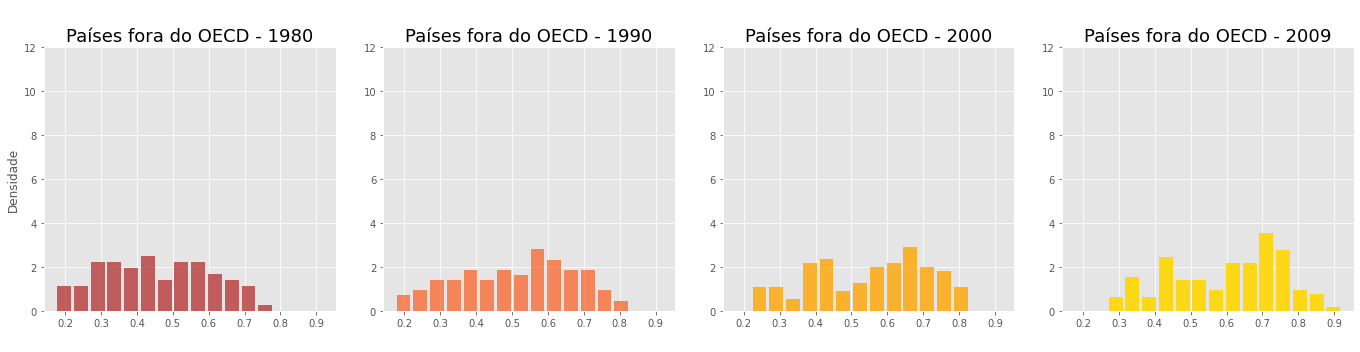

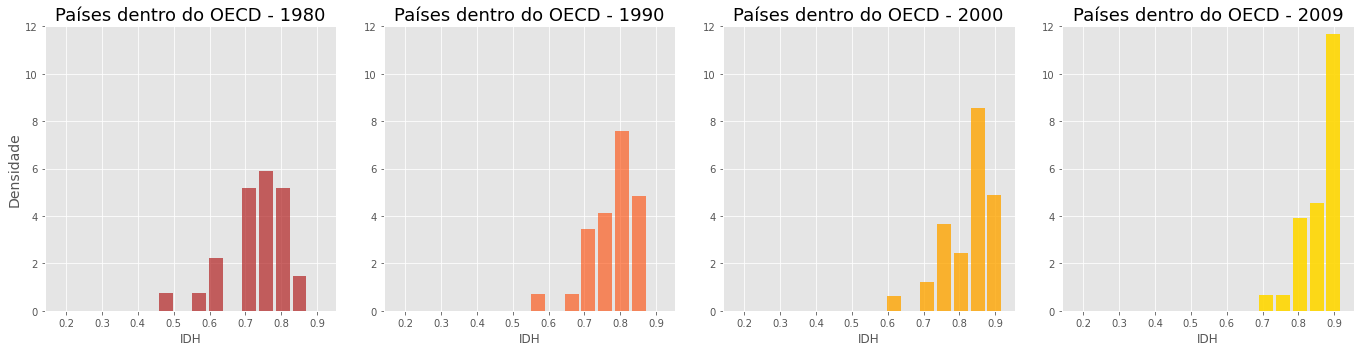

In [56]:
#Vamos plotar histogramas de IDH dos países ao longo do tempo:
fig = plt.figure(figsize=(19, 5))
plt.subplot(141)
HDI_11 = HDI_out.iloc[:,1].plot.hist(bins = faixa, density = True, color ='firebrick', alpha =0.7, rwidth =0.83)
plt.title("\nPaíses fora do OECD - 1980",size=18)
plt.ylabel('Densidade')
plt.xlabel(' ')
HDI_11.set(ylim=(0,12))

plt.subplot(142)
HDI_12 = HDI_out.iloc[:,2].plot.hist(bins = faixa, density = True, color ='orangered', alpha =0.6, rwidth =0.83)
plt.title("\nPaíses fora do OECD - 1990",size=18)
plt.ylabel(' ')
plt.xlabel(' ')
HDI_12.set(ylim=(0,12))

plt.subplot(143)
HDI_13 = HDI_out.iloc[:,3].plot.hist(bins = faixa, density = True, color ='orange', alpha =0.8, rwidth =0.83) 
plt.title("\nPaíses fora do OECD - 2000",size=18)
plt.ylabel(' ')
plt.xlabel(' ')
HDI_13.set(ylim=(0,12))

plt.subplot(144)
HDI_14 = HDI_out.iloc[:,4].plot.hist(bins = faixa, density = True, color ='gold', alpha =0.9, rwidth =0.83)
plt.title("\nPaíses fora do OECD - 2009",size=18)
plt.ylabel(' ')
plt.xlabel(' ')
HDI_14.set(ylim=(0,12))
plt.tight_layout()
plt.show()

fig = plt.figure(figsize=(19, 5))
plt.subplot(141)
HDI_21 = HDI_in.iloc[:,1].plot.hist(bins = faixa, density = True, color ='firebrick', alpha =0.7, rwidth =0.83)
plt.title("Países dentro do OECD - 1980",size=18)
plt.ylabel('Densidade',size=14)
plt.xlabel('IDH')
HDI_21.set(ylim=(0,12))

plt.subplot(142)
HDI_22 = HDI_in.iloc[:,2].plot.hist(bins = faixa, density = True, color ='orangered', alpha =0.6, rwidth =0.83)
plt.title("Países dentro do OECD - 1990",size=18)
plt.ylabel(' ')
plt.xlabel('IDH')
HDI_22.set(ylim=(0,12))

plt.subplot(143)
HDI_23 = HDI_in.iloc[:,3].plot.hist(bins = faixa, density = True, color ='orange', alpha =0.8, rwidth =0.83) 
plt.title("Países dentro do OECD - 2000",size=18)
plt.ylabel(' ')
plt.xlabel('IDH')
HDI_23.set(ylim=(0,12))

plt.subplot(144)
HDI_24 = HDI_in.iloc[:,4].plot.hist(bins = faixa, density = True, color ='gold', alpha =0.9, rwidth =0.83)
plt.title("Países dentro do OECD - 2009",size=18)
plt.ylabel(' ')
plt.xlabel('IDH')
HDI_24.set(ylim=(0,12))
plt.tight_layout()
plt.show()

Podemos observar que dentre os países análisados, os que pertencem à **OECD** possuem uma assimetria a esquerda e uma alta densidade de países com um IDH mais elevado. Já os países que não fazem parte da organização possuem uma distribuição com maior dispersão dos países, portanto tem uma quantidade grande de países mas eles ficam distribuidos desde um IDH bem pequeno até um grande.

<br>

...

#### Vamos checar de maneira mais organizada e clara estes dados:

<br>
Nesta parte vamos usar medidas especificas de cada ano dos dataframes para enriquecer nosso estudo, além disso, vamos separar os países que pertencem a organização e os países que não pertencem, as medidas são: O valor da média; O valor da mediana; o valor do desvio padrão; os valor maximo e também o valor mínimo.

In [85]:
#Criando uma lista com os valores da quantidade de países em cada ano:
HDI_Count = ["Qtd de países","{:.2f}".format(HDI_out.iloc[:,1].count()),"{:.2f}".format(HDI_out.iloc[:,2].count()),
               "{:.2f}".format(HDI_out.iloc[:,3].count()),"{:.2f}".format(HDI_out.iloc[:,4].count()),"","|","",
               "{:.2f}".format(HDI_in.iloc[:,1].count()),"{:.2f}".format(HDI_in.iloc[:,2].count()),
               "{:.2f}".format(HDI_in.iloc[:,3].count()),"{:.2f}".format(HDI_in.iloc[:,4].count())]

#Criando uma lista com os valores das médias de cada ano:
HDI_Average = ["Média","{:.2f}".format(HDI_out.iloc[:,1].mean()),"{:.2f}".format(HDI_out.iloc[:,2].mean()),
               "{:.2f}".format(HDI_out.iloc[:,3].mean()),"{:.2f}".format(HDI_out.iloc[:,4].mean()),"","|","",
               "{:.2f}".format(HDI_in.iloc[:,1].mean()),"{:.2f}".format(HDI_in.iloc[:,2].mean()),
               "{:.2f}".format(HDI_in.iloc[:,3].mean()),"{:.2f}".format(HDI_in.iloc[:,4].mean())]
#Criando uma lista com os valores das medianas de cada ano:
HDI_Median = ["Mediana","{:.2f}".format(HDI_out.iloc[:,1].median()),"{:.2f}".format(HDI_out.iloc[:,2].median()),
              "{:.2f}".format(HDI_out.iloc[:,3].median()),"{:.2f}".format(HDI_out.iloc[:,4].median()),"","|","",
              "{:.2f}".format(HDI_in.iloc[:,1].median()),"{:.2f}".format(HDI_in.iloc[:,2].median()),
              "{:.2f}".format(HDI_in.iloc[:,3].median()),"{:.2f}".format(HDI_in.iloc[:,4].median())]
HDI_SD = ["Desvio Padrão","{:.2f}".format(HDI_out.iloc[:,1].std()),"{:.2f}".format(HDI_out.iloc[:,2].std()),
               "{:.2f}".format(HDI_out.iloc[:,3].std()),"{:.2f}".format(HDI_out.iloc[:,4].std()),"","|","",
               "{:.2f}".format(HDI_in.iloc[:,1].std()),"{:.2f}".format(HDI_in.iloc[:,2].std()),
               "{:.2f}".format(HDI_in.iloc[:,3].std()),"{:.2f}".format(HDI_in.iloc[:,4].std())]
#Criando uma lista com os valores Minimos de cada ano:
HDI_Min = ["Mínimo","{:.2f}".format(HDI_out.iloc[:,1].min()),"{:.2f}".format(HDI_out.iloc[:,2].min()),
              "{:.2f}".format(HDI_out.iloc[:,3].min()),"{:.2f}".format(HDI_out.iloc[:,4].min()),"","|",
              "","{:.2f}".format(HDI_in.iloc[:,1].min()),"{:.2f}".format(HDI_in.iloc[:,2].min()),
              "{:.2f}".format(HDI_in.iloc[:,3].min()),"{:.2f}".format(HDI_in.iloc[:,4].min())]
#Criando uma lista com os valores Maximos de cada ano:
HDI_Max = ["Máximo","{:.2f}".format(HDI_out.iloc[:,1].max()),"{:.2f}".format(HDI_out.iloc[:,2].max()),
              "{:.2f}".format(HDI_out.iloc[:,3].max()),"{:.2f}".format(HDI_out.iloc[:,4].max()),"","|",
              "","{:.2f}".format(HDI_in.iloc[:,1].max()),"{:.2f}".format(HDI_in.iloc[:,2].max()),
              "{:.2f}".format(HDI_in.iloc[:,3].max()),"{:.2f}".format(HDI_in.iloc[:,4].max())]

In [86]:
#Atribuindo os valores à lista com todos dados:
data_hdi = [HDI_Count,HDI_Average,HDI_Median,HDI_SD,HDI_Min,HDI_Max]
#Transformando nossa lista em um dataframe, e atribuindo os nomes das colunas:
data_hdi_1 = pd.DataFrame(data_hdi, columns=["HDI","FORA_1980","FORA_1990","FORA_2000","FORA_2009","","|",
                                    "", "MEMBRO_1990","MEMBRO_1990","MEMBRO_2000","MEMBRO_2009"])
#Alterando o index para IDH:
data_hdi_2 = data_hdi_1.set_index('HDI')
#Plotando o dataframe:
data_hdi_2

,FORA_1980,FORA_1990,FORA_2000,FORA_2009,,|,,MEMBRO_1990,MEMBRO_1990,MEMBRO_2000,MEMBRO_2009
HDI,,,,,,,,,,,
Qtd de países,77.00,92.00,118.00,139.00,,|,,29.00,31.00,35.00,35.00
Média,0.46,0.51,0.55,0.60,,|,,0.73,0.78,0.83,0.86
Mediana,0.45,0.54,0.58,0.64,,|,,0.74,0.79,0.84,0.88
Desvio Padrão,0.15,0.16,0.16,0.16,,|,,0.08,0.07,0.06,0.05
Mínimo,0.17,0.19,0.22,0.28,,|,,0.46,0.56,0.63,0.69
Máximo,0.75,0.79,0.82,0.89,,|,,0.85,0.87,0.91,0.94


<br>

A partir dos dados na tabela podemos perceber, que o crescimento de ambos é de certa forma similar, contudo como o desvio padrão diminui nos países membros, fato que não se repete nos outros, podemos afirmar que há um desenvolvimento superior nos anos análisadosno grupo que pertennce a organização.

...

#### Vamos analisar os dados dos anos em grafícos de boxplot:

<br>
Este tipo de análise é bom para determinar a dispersão, simetria, caudas e valores discrepantes (outliers) do conjunto de dados

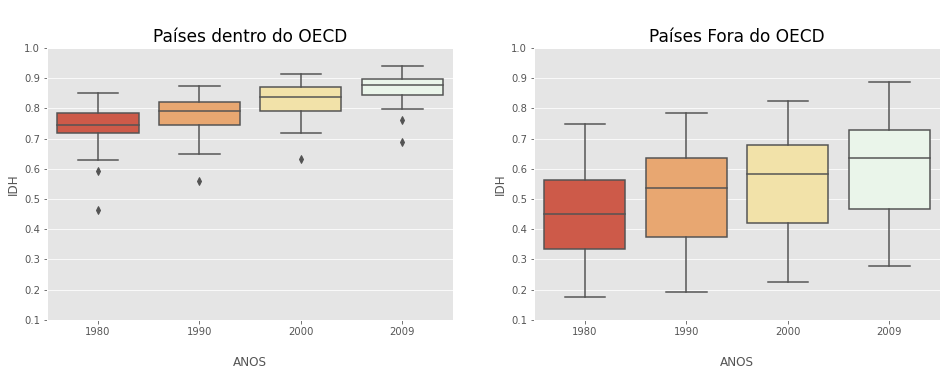

In [28]:
#Vamos definir o tamanho das figuras:
fig = plt.figure(figsize=(16, 5))
plt.subplot(121)
#Fornecendo o dataframe que usaremos para o Boxplot:
ax_hdi = sns.boxplot(data = HDI_in)
#Fornecendo as caracteristicas do gráfico:
plt.title("\nPaíses dentro do OECD",size=17)
plt.ylabel('IDH')
plt.xlabel('\nANOS')
ax_hdi.set(ylim=(0.1,1))

plt.subplot(122)
#Fornecendo o dataframe que usaremos para o Boxplot:
ax_hdi_1 = sns.boxplot(data = HDI_out)
#Fornecendo as caracteristicas do gráfico:
plt.title("\nPaíses Fora do OECD",size=17)
plt.ylabel('IDH')
plt.xlabel('\nANOS')
ax_hdi_1.set(ylim=(0.1,1))
plt.show()

Análisando os dados fornecidos por estes gráficos de boxplot, é possível perceber que ambos grupos tiveram um crescimento significativo no período estudado. Porém vemos que enquanto o grupo dos membros da **OECD** diminui a quantidade de países nos dois primeiros quartis, o grupo dos países ausentes não diminui a quantidade nos mesmos quartis.


___

...

#### 2.2 Analisando o crescimento do PIB:

Para que seja possível comparar o crescimento do PIB dos países de fora do OECD com os que pertencem a organização, é necessário declarar quais países pertencem a que grupo a ser avaliado, portanto primeiro vamos separar o nosso dataframe inicial em dois.

In [29]:
#Criando um dataframe com os dados obtidos do IDH dos Países dentro da Organização:
GDP_in = GDP_years.drop(GDP_years.loc[GDP_years['OECD']== "FORA"].index)

In [30]:
#Criando um dataframe com os dados obtidos do IDH dos Países fora da Organização:
GDP_out = GDP_years.drop(GDP_years.loc[GDP_years['OECD']== "DENTRO"].index)



<br>

#### Estudo das distribuições do PIB:
<br>

Vamos começar esta análise com histogramas de cada ano, isolando os países que fazem parte da **OECD** . Para que possamos prosseguir, e como desta vez iremos utilizar a biblioteca seaborn para nos auxiliar em nosso estudo, não precisaremos descobrir a amplitude dos dados, uma vez que esta é feita automaticamente:

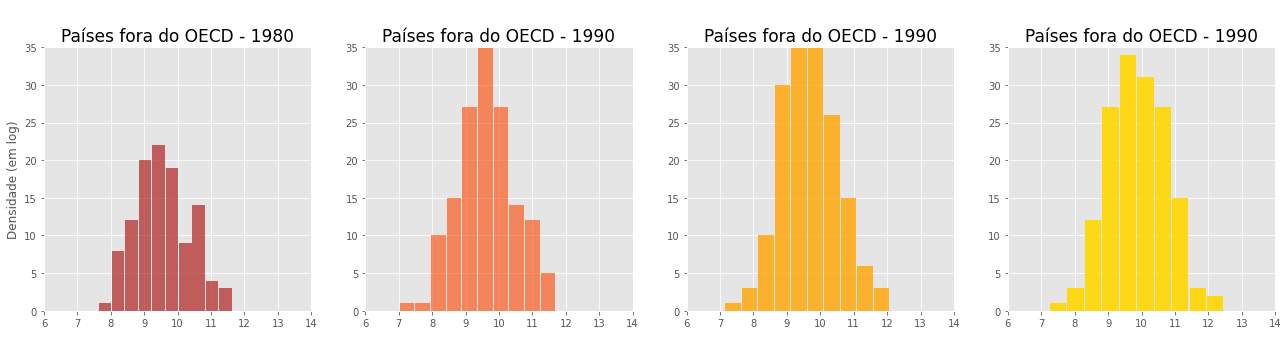

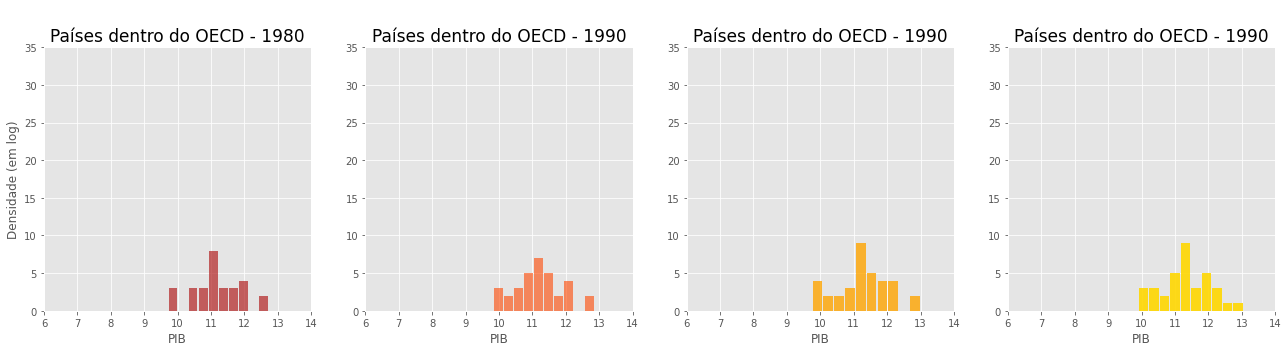

In [33]:
#Vamos plotar histogramas de PIB dos países ao longo do tempo:
fig = plt.figure(figsize=(18, 5))
plt.subplot(141)
GDP11 = sns.distplot(np.log10(GDP_out.iloc[:,1]).dropna(),kde=False, bins = 10, hist_kws={"linewidth": 3,
                                            "alpha": 0.7, "color": "firebrick", "rwidth" :0.93});
plt.title("\nPaíses fora do OECD - 1980",size=17)
plt.ylabel('Densidade (em log)')
plt.xlabel(' ')
GDP11.set(xlim=(6, 14),ylim=(0,35))

plt.subplot(142)
GDP12 = sns.distplot(np.log10(GDP_out.iloc[:,2]).dropna(),kde=False, bins = 10, hist_kws={"linewidth": 3,
                                                    "alpha": 0.6, "color": "orangered", "rwidth" :0.93});
plt.title("\nPaíses fora do OECD - 1990",size=17)
plt.ylabel(' ')
plt.xlabel(' ')
GDP12.set(xlim=(6, 14),ylim=(0,35))

plt.subplot(143)
GDP13 = sns.distplot(np.log10(GDP_out.iloc[:,3]).dropna(),kde=False, bins = 10, hist_kws={"linewidth": 3,
                                                       "alpha": 0.8, "color": "orange", "rwidth" :0.93});
plt.title("\nPaíses fora do OECD - 1990",size=17)
plt.ylabel(' ')
plt.xlabel(' ')
GDP13.set(xlim=(6, 14),ylim=(0,35))

plt.subplot(144)
GDP14 = sns.distplot(np.log10(GDP_out.iloc[:,4]).dropna(),kde=False, bins = 10, hist_kws={"linewidth": 3,
                                                         "alpha": 0.9, "color": "gold", "rwidth" :0.93});
plt.title("\nPaíses fora do OECD - 1990",size=17)
plt.ylabel(' ')
plt.xlabel(' ')
GDP14.set(xlim=(6, 14),ylim=(0,35))
plt.tight_layout()
plt.show()

fig = plt.figure(figsize=(18, 5))
plt.subplot(141)
GDP21 = sns.distplot(np.log10(GDP_in.iloc[:,1]).dropna(),kde=False, bins = 10, hist_kws={"linewidth": 3,
                                                   "alpha": 0.7, "color": "firebrick", "rwidth" :0.88});
plt.title("\nPaíses dentro do OECD - 1980",size=17)
plt.ylabel('Densidade (em log)')
plt.xlabel('PIB')
GDP21.set(xlim=(6, 14),ylim=(0,35))

plt.subplot(142)
GDP22 = sns.distplot(np.log10(GDP_in.iloc[:,2]).dropna(),kde=False, bins = 10, hist_kws={"linewidth": 3,
                                                   "alpha": 0.6, "color": "orangered", "rwidth" :0.88});
plt.title("\nPaíses dentro do OECD - 1990",size=17)
plt.ylabel(' ')
plt.xlabel('PIB')
GDP22.set(xlim=(6, 14),ylim=(0,35))

plt.subplot(143)
GDP23 = sns.distplot(np.log10(GDP_in.iloc[:,3]).dropna(),kde=False, bins = 10, hist_kws={"linewidth": 3,
                                                       "alpha": 0.8, "color": "orange", "rwidth" :0.9});
plt.title("\nPaíses dentro do OECD - 1990",size=17)
plt.ylabel(' ')
plt.xlabel('PIB')
GDP23.set(xlim=(6, 14),ylim=(0,35))

plt.subplot(144)
GDP24 = sns.distplot(np.log10(GDP_in.iloc[:,4]).dropna(),kde=False, bins = 10, hist_kws={"linewidth": 3,
                                                         "alpha": 0.9, "color": "gold", "rwidth" :0.9});
plt.title("\nPaíses dentro do OECD - 1990",size=17)
plt.ylabel(' ')
plt.xlabel('PIB')
GDP24.set(xlim=(6, 14),ylim=(0,35))
plt.tight_layout()
plt.show()

A partir da comparação dos histogramas, conseguimos identificar que os países que nao fazem parte da OECD não só melhoram um pouco o seu PIB, como a distribuição também apresenta uma melhora: de levemente a direita, para uma distribuição que se aproxima de uma normal. Já os países que compõe a **OECD** não apresentam uma mudança substancial de distribuição, mas ainda sim eles conseguem melhorar seu Produto Insterno Bruto.

...

#### Vamos checar de maneira mais organizada e clara estes dados:

<br>
Novamente vamos usar medidas especificas de cada ano dos dataframes para enriquecer nosso estudo. Relembrando as medias: O valor da média; O valor da mediana; o valor do desvio padrão; os valor maximo e também o valor mínimo.

In [80]:
#Criando uma lista com os valores da quantidade de países em cada ano:
GDP_Count = ["Qtd de Países","{:.2f}".format(GDP_out.iloc[:,1].count()), "{:.2f}".format(GDP_out.iloc[:,2].count()),
               "{:.2f}".format(GDP_out.iloc[:,3].count()),"{:.2f}".format(GDP_out.iloc[:,4].count()),"","|","",
               "{:.2f}".format(GDP_in.iloc[:,1].count()),"{:.2f}".format(GDP_in.iloc[:,2].count()),
               "{:.2f}".format(GDP_in.iloc[:,3].count()),"{:.2f}".format(GDP_in.iloc[:,4].count())]

#Criando uma lista com os valores das médias de cada ano:
GDP_Average = ["Média","{:.2f}".format((GDP_out.iloc[:,1].mean())/10000000000), "{:.2f}".format((GDP_out.iloc[:,2].mean())/10000000000),
               "{:.2f}".format((GDP_out.iloc[:,3].mean())/10000000000),"{:.2f}".format((GDP_out.iloc[:,4].mean())/10000000000),"","|","",
               "{:.2f}".format((GDP_in.iloc[:,1].mean())/10000000000),"{:.2f}".format((GDP_in.iloc[:,2].mean())/10000000000),
               "{:.2f}".format((GDP_in.iloc[:,3].mean())/10000000000),"{:.2f}".format((GDP_in.iloc[:,4].mean())/10000000000)]
#Criando uma lista com os valores das medianas de cada ano:
GDP_Median = ["Mediana","{:.2f}".format((GDP_out.iloc[:,1].median())/10000000000), "{:.2f}".format((GDP_out.iloc[:,2].median())/10000000000),
              "{:.2f}".format((GDP_out.iloc[:,3].median())/10000000000),"{:.2f}".format((GDP_out.iloc[:,4].median())/10000000000),"","|","",
              "{:.2f}".format((GDP_in.iloc[:,1].median())/10000000000),"{:.2f}".format((GDP_in.iloc[:,2].median())/10000000000),
              "{:.2f}".format((GDP_in.iloc[:,3].median())/10000000000),"{:.2f}".format((GDP_in.iloc[:,4].median())/10000000000)]
GDP_SD = ["Desvio Padrão","{:.2f}".format((GDP_out.iloc[:,1].std())/10000000000), "{:.2f}".format((GDP_out.iloc[:,2].std())/10000000000),
               "{:.2f}".format((GDP_out.iloc[:,3].std())/10000000000),"{:.2f}".format((GDP_out.iloc[:,4].std())/10000000000),"","|","",
               "{:.2f}".format((GDP_in.iloc[:,1].std())/10000000000),"{:.2f}".format((GDP_in.iloc[:,2].std())/10000000000),
               "{:.2f}".format((GDP_in.iloc[:,3].std())/10000000000),"{:.2f}".format((GDP_in.iloc[:,4].std())/10000000000)]
#Criando uma lista com os valores Minimos de cada ano:
GDP_Min = ["Mínimo","{:.3f}".format((GDP_out.iloc[:,1].min())/10000000000), "{:.3f}".format((GDP_out.iloc[:,2].min())/10000000000),
              "{:.3f}".format((GDP_out.iloc[:,3].min())/10000000000),"{:.3f}".format((GDP_out.iloc[:,4].min())/10000000000),"","|",
              "","{:.2f}".format((GDP_in.iloc[:,1].min())/10000000000),"{:.2f}".format((GDP_in.iloc[:,2].min())/10000000000),
              "{:.2f}".format((GDP_in.iloc[:,3].min())/10000000000),"{:.2f}".format((GDP_in.iloc[:,4].min())/10000000000)]
#Criando uma lista com os valores Maximos de cada ano:
GDP_Max = ["Máximo","{:.2f}".format((GDP_out.iloc[:,1].max())/10000000000), "{:.2f}".format((GDP_out.iloc[:,2].max())/10000000000),
              "{:.2f}".format((GDP_out.iloc[:,3].max())/10000000000),"{:.2f}".format((GDP_out.iloc[:,4].max())/10000000000),"","|",
              "","{:.2f}".format((GDP_in.iloc[:,1].max())/10000000000),"{:.2f}".format((GDP_in.iloc[:,2].max())/10000000000),
              "{:.2f}".format((GDP_in.iloc[:,3].max())/10000000000),"{:.2f}".format((GDP_in.iloc[:,4].max())/10000000000)]

In [82]:
#Atribuindo os valores à lista com todos dados:
data_gdp = [GDP_Count,GDP_Average,GDP_Median,GDP_SD,GDP_Min,GDP_Max]
#Transformando nossa lista em um dataframe, e atribuindo os nomes das colunas:
data_gdp_1 = pd.DataFrame(data_gdp, columns=["GDP","FORA_1980","FORA_1990","FORA_2000","FORA_2009","","|",
                                    "", "MEMBRO_1990","MEMBRO_1990","MEMBRO_2000","MEMBRO_2009"])
#Alterando o index para IDH:
data_gdp_2 = data_gdp_1.set_index('GDP')
#Plotando o dataframe:
data_gdp_2

,FORA_1980,FORA_1990,FORA_2000,FORA_2009,,|,,MEMBRO_1990,MEMBRO_1990,MEMBRO_2000,MEMBRO_2009
GDP,,,,,,,,,,,
Qtd de Países,112.00,148.00,164.00,155.00,,|,,29.00,33.00,35.00,35.00
Média,2.09,2.60,3.50,6.28,,|,,49.97,61.13,74.93,84.15
Mediana,0.33,0.37,0.44,0.74,,|,,12.80,14.74,17.13,21.89
Desvio Padrão,5.33,7.07,11.79,25.96,,|,,104.59,139.61,181.25,201.70
Mínimo,0.004,0.001,0.001,0.002,,|,,0.52,0.68,0.57,0.78
Máximo,43.04,50.18,119.85,294.02,,|,,514.22,706.39,989.88,1120.92


...

#### Vamos analisar os dados dos anos em grafícos de boxplot:

<br>
Este tipo de análise é bom para determinar a dispersão, simetria, caudas e valores discrepantes (outliers) do conjunto de dados

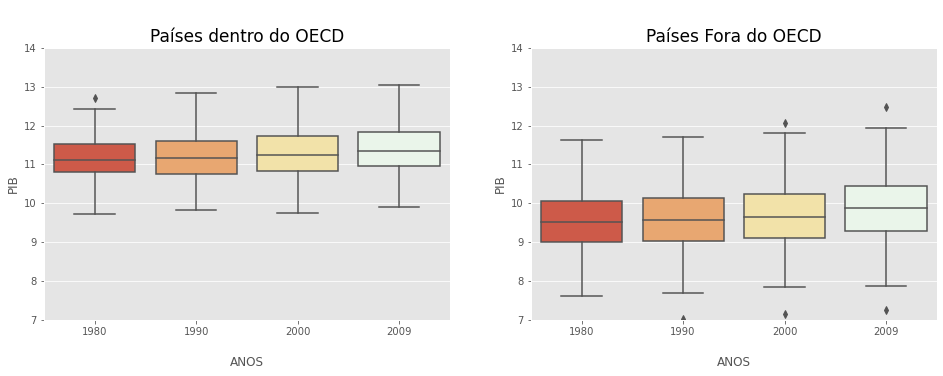

In [36]:
#Vamos definir o tamanho das figuras:
fig = plt.figure(figsize=(16, 5))
plt.subplot(121)
#Fornecendo o dataframe que usaremos para o Boxplot:
ax_gdp = sns.boxplot(data = np.log10(GDP_in.iloc[:,[1,2,3,4]]))
#Fornecendo as caracteristicas do gráfico:
plt.title("\nPaíses dentro do OECD",size=17)
plt.ylabel('PIB')
plt.xlabel('\nANOS')
ax_gdp.set(ylim=(7,14))

plt.subplot(122)
#Fornecendo o dataframe que usaremos para o Boxplot:
ax_gdp_1 = sns.boxplot(data = np.log10(GDP_out.iloc[:,[1,2,3,4]]))
#Fornecendo as caracteristicas do gráfico:
plt.title("\nPaíses Fora do OECD",size=17)
plt.ylabel('PIB')
plt.xlabel('\nANOS')
ax_gdp_1.set(ylim=(7,14))
plt.show()

Através da análise destes boxplots, conseguimos definir que de fato os paises dentro da OECD tiveram um crescimento maior do que os países do outro grupo, além de ter aumentado a quantidade de países no seu terceiro quartil em 2009 que mostra uma mudança na sua distribuição, para melhor. Enquanto os países de fora cresceram de maneira praticamente constante, e quase sem mudar seus quartis.

___

...
<br>

#### 2.3 Analisando os Invstimentos estrangeiros:



In [37]:
#Criando um dataframe com os dados obtidos do IDH dos Países dentro da Organização:
Investment_in = Foreign_investment_years.drop(Foreign_investment_years.loc[
                                                Foreign_investment_years['OECD'] == "FORA"].index)

In [38]:
#Criando um dataframe com os dados obtidos do IDH dos Países fora da Organização:
Investment_out = Foreign_investment_years.drop(Foreign_investment_years.loc[
                                                Foreign_investment_years['OECD'] == "DENTRO"].index)

...

Vamos passar rapidamente pelas características dos investimentos:

In [70]:
#Vamos checar como foi o crescimento dos países que não fazem parte da organização:
print("Países de fora da OECD:")
Investment_out.describe().round(3).loc[['count', 'mean', 'std', 'min' , 'max']]

Países de fora da OECD:


,1980,1990,2000,2009
count,91.000,115.000,141.000,150.000
mean,1.574,2.182,4.034,5.033
std,3.642,6.636,10.108,5.190
min,-13.600,-19.800,-16.600,-2.410
max,21.100,58.600,113.000,37.200


In [72]:
#Vamos checar como foi o crescimento dos países que fazem parte da organização:
print("Países de dentro da OECD:")
Investment_in.describe().round(3).loc[['count', 'mean', 'std', 'min' , 'max']]

Países de dentro da OECD:


,1980,1990,2000,2009
count,25.000,27.000,33.000,35.000
mean,0.619,1.296,6.275,4.585
std,0.591,1.137,5.983,9.966
min,0.009,0.057,-2.870,-3.510
max,2.120,3.810,25.500,53.100


É possivel perceber que os investimentos no começo da organização eram mais escassos, porém como o decorrer dos anos o cenário mudou para os membros, que passaram a ter mais um valor maximo de investimento, maior que o valor dos países fora do grupo.

___

### 3. Correlações entre as variáveis:

...

<br>

#### Vamos correlacionar os dados do PIB per capta com os dados do IDH:

Como visto na análise exploratória, ambos crescem mais para os países que pertencem a **`OECD`**, mas como será a sua correlação?

In [41]:
#Criando dataframes para fazer a correlação:

#1990 - out
_IDH90_out = pd.DataFrame(HDI_out.iloc[:,2])
_GDP90_out = pd.DataFrame(GDP_out.iloc[:,2])
corr_out90 = _IDH90_out[1990].corr(_GDP90_out[1990])

#2000 - out
_IDH00_out = pd.DataFrame(HDI_out.iloc[:,3])
_GDP00_out = pd.DataFrame(GDP_out.iloc[:,3])
corr_out00 = _IDH00_out[2000].corr(_GDP00_out[2000])

#2009 - out
_IDH09_out = pd.DataFrame(HDI_out.iloc[:,4])
_GDP09_out = pd.DataFrame(GDP_out.iloc[:,4])
corr_out09 = _IDH09_out[2009].corr(_GDP09_out[2009])

#1990 - in
_IDH90_in = pd.DataFrame(HDI_in.iloc[:,2])
_GDP90_in = pd.DataFrame(GDP_in.iloc[:,2])
corr_in90 = _IDH90_in[1990].corr(_GDP90_in[1990])

#2000 - in
_IDH00_in = pd.DataFrame(HDI_in.iloc[:,3])
_GDP00_in = pd.DataFrame(GDP_in.iloc[:,3])
corr_in00 = _IDH00_in[2000].corr(_GDP00_in[2000])

#2009 - in
_IDH09_in = pd.DataFrame(HDI_in.iloc[:,4])
_GDP09_in = pd.DataFrame(GDP_in.iloc[:,4])
corr_in09 = _IDH09_in[2009].corr(_GDP09_in[2009])

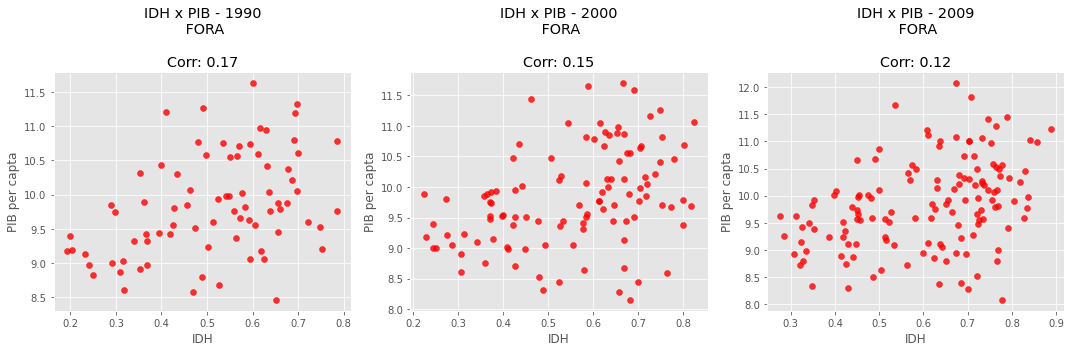

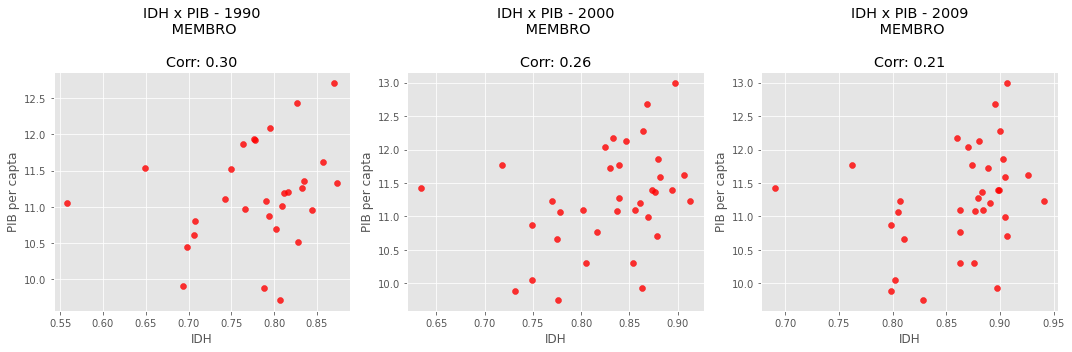

In [42]:
#Vamos definir o tamanho das figuras:
fig = plt.figure(figsize=(15, 5))
plt.subplot(131)
#Definindo os dados que vamos relacionar:
plt.scatter(HDI_out.iloc[:,2], np.log10(GDP_out.iloc[:,1]), c='red', alpha=0.8)
plt.title("IDH x PIB - 1990\n FORA\n\nCorr: {:.2f}".format(corr_out90))
plt.xlabel('IDH')
plt.ylabel('PIB per capta')

plt.subplot(132)
plt.scatter(HDI_out.iloc[:,3], np.log10(GDP_out.iloc[:,2]), c='red', alpha=0.8)
plt.title("IDH x PIB - 2000\n FORA\n\nCorr: {:.2f}".format(corr_out00))
plt.xlabel('IDH')
plt.ylabel('PIB per capta')

plt.subplot(133)
plt.scatter(HDI_out.iloc[:,4], np.log10(GDP_out.iloc[:,3]), c='red', alpha=0.8)
plt.title("IDH x PIB - 2009\n FORA\n\nCorr: {:.2f}".format(corr_out09))
plt.xlabel('IDH')
plt.ylabel('PIB per capta')
plt.tight_layout()
plt.show()

fig = plt.figure(figsize=(15, 5))
plt.subplot(131)
plt.scatter(HDI_in.iloc[:,2], np.log10(GDP_in.iloc[:,1]), c='red', alpha=0.8)
plt.title("IDH x PIB - 1990\n MEMBRO\n\nCorr: {:.2f}".format(corr_in90))
plt.xlabel('IDH')
plt.ylabel('PIB per capta')

plt.subplot(132)
plt.scatter(HDI_in.iloc[:,3], np.log10(GDP_in.iloc[:,3]), c='red', alpha=0.8)
plt.title("IDH x PIB - 2000\n MEMBRO\n\nCorr: {:.2f}".format(corr_in00))
plt.xlabel('IDH')
plt.ylabel('PIB per capta')

plt.subplot(133)
plt.scatter(HDI_in.iloc[:,4], np.log10(GDP_in.iloc[:,3]), c='red', alpha=0.8)
plt.title("IDH x PIB - 2009\n MEMBRO\n\nCorr: {:.2f}".format(corr_in09))
plt.xlabel('IDH')
plt.ylabel('PIB per capta')
plt.tight_layout()
plt.show()

É possivel afirmar que os países da organização escolhida tem seus dados mais proximos e com uma correlação superior a dos países fora da mesma organização.

...
<br>

#### Vamos conferir mais detalhadamente cada relação em todos anos:



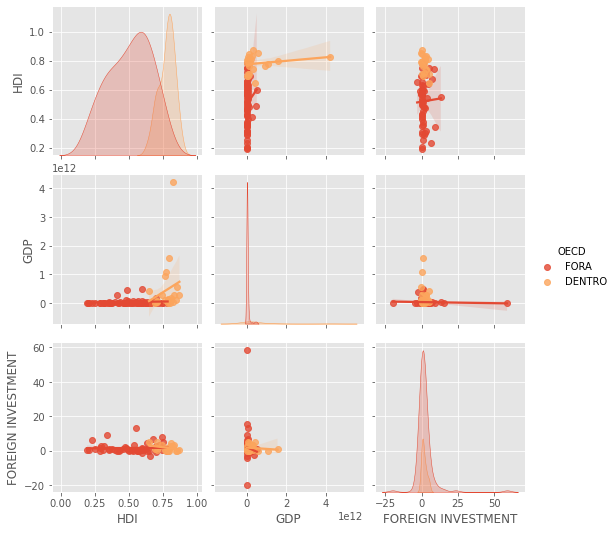

In [43]:
#Plotando gráficos de correlação entre as variáveis usadas em 1980:
sns.pairplot(df_1990, height = 2.5, hue = 'OECD', kind="reg");

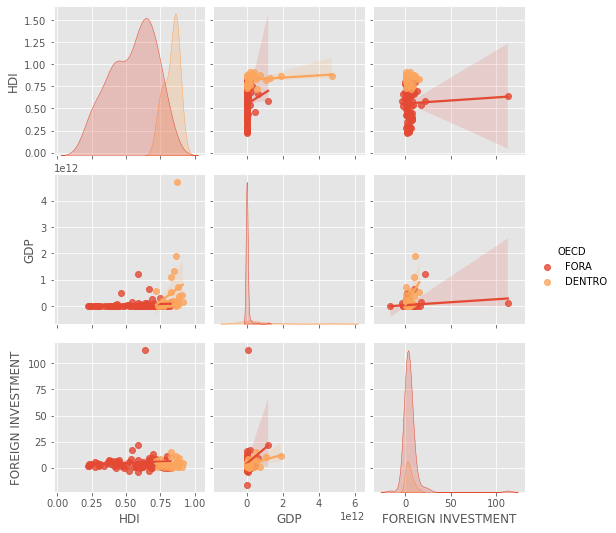

In [44]:
#Plotando gráficos de correlação entre as variáveis usadas em 2000:
sns.pairplot(df_2000, height = 2.5, hue = 'OECD', kind="reg");

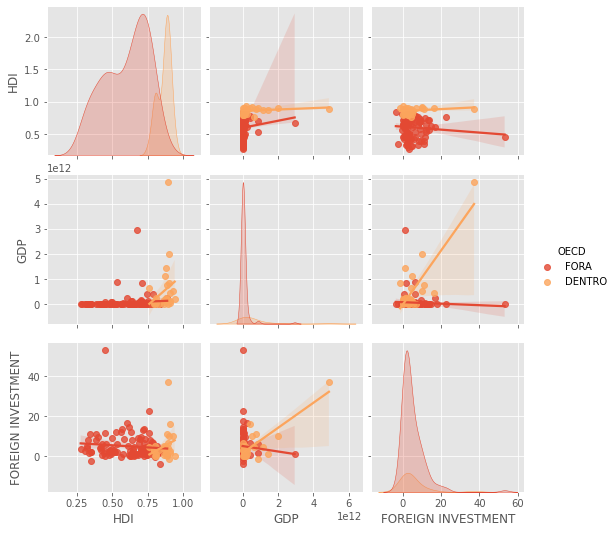

In [45]:
#Plotando gráficos de correlação entre as variáveis usadas em 2009:
sns.pairplot(df_2009, height = 2.5, hue = 'OECD', kind="reg");

...
<br>

#### Agora vamos ver de forma númerica:

In [46]:
#Criando um dataframe com os dados obtidos do IDH dos Países dentro da Organização:
df_1990_in = df_1990.drop(df_1990.loc[df_1990['OECD'] == "FORA"].index)

#Criando um dataframe com os dados obtidos do IDH dos Países fora da Organização:
df_1990_out = df_1990.drop(df_1990.loc[df_1990['OECD'] == "DENTRO"].index)

In [47]:
#Criando um dataframe com os dados obtidos do IDH dos Países dentro da Organização:
df_2000_in = df_2000.drop(df_2000.loc[df_2000['OECD'] == "FORA"].index)

#Criando um dataframe com os dados obtidos do IDH dos Países fora da Organização:
df_2000_out = df_2000.drop(df_2000.loc[df_2000['OECD'] == "DENTRO"].index)

In [48]:
#Criando um dataframe com os dados obtidos do IDH dos Países dentro da Organização:
df_2009_in = df_2009.drop(df_2009.loc[df_2009['OECD'] == "FORA"].index)

#Criando um dataframe com os dados obtidos do IDH dos Países fora da Organização:
df_2009_out = df_2009.drop(df_2009.loc[df_2009['OECD'] == "DENTRO"].index)

In [49]:
#Criando listas com os valores das correlações de cada ano:
corr_invest_1990_in = ["1990",df_1990_in["HDI"].corr(df_1990_in["FOREIGN INVESTMENT"]),
                    df_1990_in["GDP"].corr(df_1990_in["FOREIGN INVESTMENT"]),]
corr_invest_2000_in = ["2000",df_2000_in["HDI"].corr(df_2000_in["FOREIGN INVESTMENT"]),
                    df_2000_in["GDP"].corr(df_2000_in["FOREIGN INVESTMENT"]),]
corr_invest_2009_in = ["2009",df_2009_in["HDI"].corr(df_2009_in["FOREIGN INVESTMENT"]),
                    df_2009_in["GDP"].corr(df_2009_in["FOREIGN INVESTMENT"]),]

#Criando listas com os valores das correlações de cada ano:
corr_invest_1990_out = ["1990",df_1990_out["HDI"].corr(df_1990_out["FOREIGN INVESTMENT"]),
                    df_1990_out["GDP"].corr(df_1990_out["FOREIGN INVESTMENT"]),]
corr_invest_2000_out = ["2000",df_2000_out["HDI"].corr(df_2000_out["FOREIGN INVESTMENT"]),
                    df_2000_out["GDP"].corr(df_2000_out["FOREIGN INVESTMENT"]),]
corr_invest_2009_out = ["2009",df_2009_out["HDI"].corr(df_2009_out["FOREIGN INVESTMENT"]),
                    df_2009_out["GDP"].corr(df_2009_out["FOREIGN INVESTMENT"]),]

...
<br>

#### Dados da correlação do investimento estrangeiro com paises de dentro e fora da OECD:

As tabelas abaixo mostram as devidas correlações dos anos com os investimentos estrangeiros, marcadas como IDH ou GDP.

In [50]:
#Atribuindo os valores à lista com todos dados:
invest_corr_in = [corr_invest_1990_in, corr_invest_2000_in, corr_invest_2009_in]
#Transformando nossa lista em um dataframe, e atribuindo os nomes das colunas:
invest_corr_in_0 = pd.DataFrame(invest_corr_in, columns=["FOREIGN INVESTMENT x DENTRO", "IDH", "GDP"])
#Alterando o index para FOREIGN INVESTMENT:
invest_corr_in_1 = invest_corr_in_0.set_index('FOREIGN INVESTMENT x DENTRO')
#Plotando o dataframe:
invest_corr_in_1

,IDH,GDP
FOREIGN INVESTMENT x DENTRO,,
1990,-0.367234,-0.172740
2000,0.053154,0.511452
2009,0.241254,0.819672


In [51]:
#Atribuindo os valores à lista com todos dados:
invest_corr_out = [corr_invest_1990_out, corr_invest_2000_out, corr_invest_2009_out]
#Transformando nossa lista em um dataframe, e atribuindo os nomes das colunas:
invest_corr_out_0 = pd.DataFrame(invest_corr_out, columns=["FOREIGN INVESTMENT x FORA", "IDH", "GDP"])
#Alterando o index para FOREIGN INVESTMENT:
invest_corr_out_1 = invest_corr_out_0.set_index('FOREIGN INVESTMENT x FORA')
#Plotando o dataframe:
invest_corr_out_1

,IDH,GDP
FOREIGN INVESTMENT x FORA,,
1990,0.029709,-0.063695
2000,0.054298,0.180525
2009,-0.098229,-0.063981


____

### 4. Conclusão:
<br>

Após a análise exploratória e um estudo sobre as correlações das variáveis ao longo dos anos, podemos concluir, que de fato a associação dos 35 membros da **OECD** pode ser relacionada com um crescimento maior do IDH e do PIB (Avaliado com o valor de mercado), e podemos ver isso a partir do aumento das médias, sendo superior que do grupo que não pertence a organização, assim como a diminuição do desvio padrão, isso quando análisamos o IDH. Já as informações obtidas sobre o PIB não desviam muito das conclusões que ja fizemos para o IDH, sendo que uma das maiores mudanças é a da distribuição da cauda, que da direito começou a se aproximar de uma distribuição normal. Além de tudo isso, também podemos constatar que principalemente em 2009 há uma grande influência dos investimentos estrangeiros no crescimento do IDH, com uma correlação de aproximadamente 0,81 e no grupo dos não-membros a correlação é de aproximadamente -0,06, portanto podemos supor que tal superioridade em investimentos com o crescimento do PIB pode estar relacionada a uma imagem de estabilidade financeira, que é transmitida pelo fato de pertencer a OECD.

## Referêcias:

- https://www.gapminder.org/data/ <br>

- http://oecdobserver.org/news/archivestory.php/aid/2756/OECD_Model_Tax_Convention.html <br>

- http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.595.9257&rep=rep1&type=pdf<br>

- http://www.gresea.be/OECD-Guidelines-its-pros-and-cons <br>

- http://worldpopulationreview.com/countries/oecd-countries/<br>

### Curiosidade:

- A OECD também é chamada de "Grupo dos Ricos", porque os 35 países participantes produzem juntos mais da metade de toda a riqueza do mundo.